# Install all

In [2]:
# %pip install seaborn
# %pip install pandas_datareader
# %pip install keras
# %pip install plotly
# %pip install scikit-learn

In [1]:
# %pip install tensorflow


# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_datareader as web
import plotly.graph_objects as go


In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [3]:
import pandas as pd

# Ask the user for the company name
company_name = input("Enter the company name (e.g., ADBL): ")

# Construct the URL dynamically
url = f'https://raw.githubusercontent.com/Aabishkar2/nepse-data/refs/heads/main/data/company-wise/{company_name}.csv'

# Read the CSV data from the constructed URL
try:
    data = pd.read_csv(url)

    # Select the relevant columns
    selected_data = data[['published_date', 'close']]
    
    print(selected_data.head())
except Exception as e:
    print("Error: Unable to fetch or process the data. Please check the company name and try again.")


Error: Unable to fetch or process the data. Please check the company name and try again.


In [4]:
print('There are {} number of days in the dataset.'.format(selected_data.shape[0]))

print(selected_data.index)

NameError: name 'selected_data' is not defined

Plotting the graph


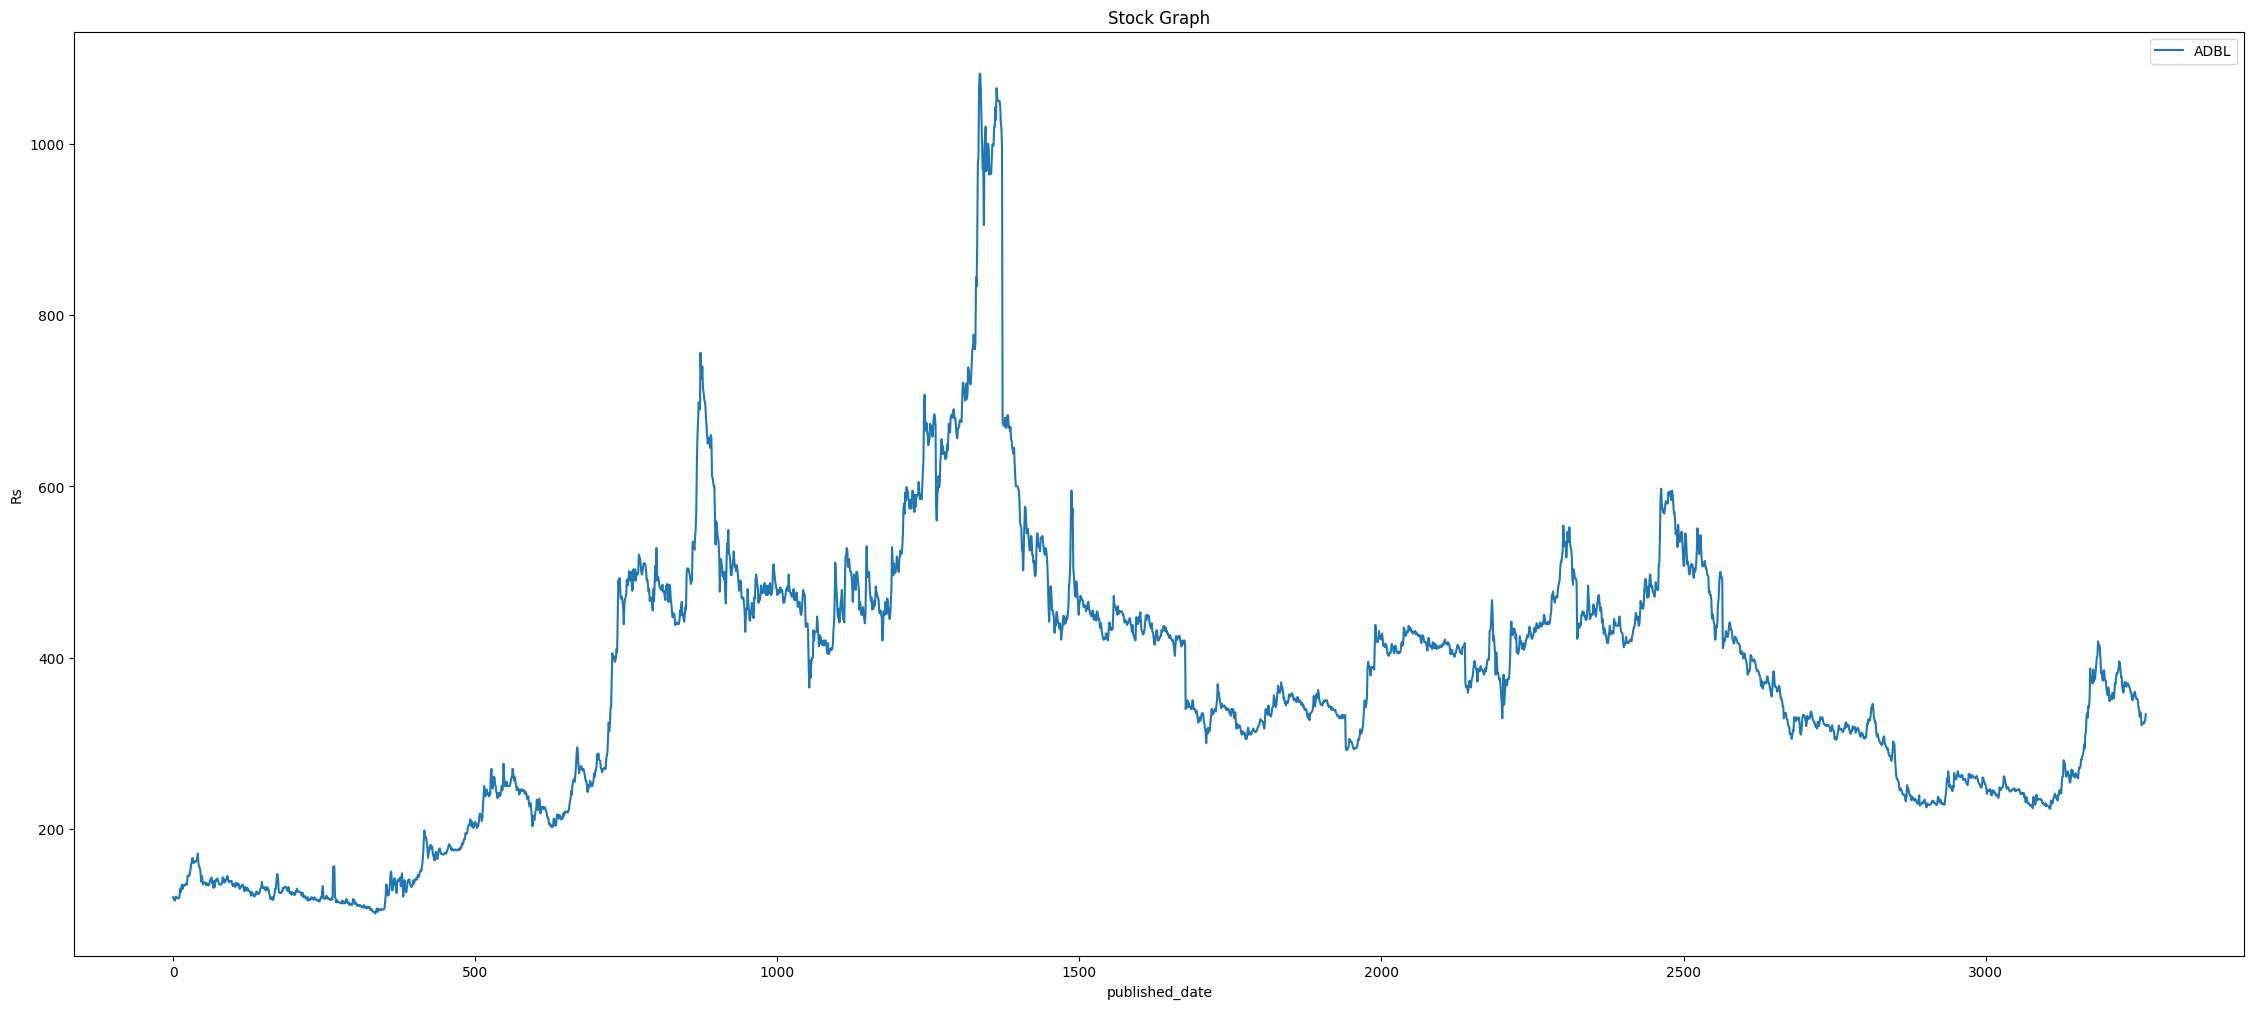

In [6]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(selected_data.index, data['close'], label='ADBL')
plt.xlabel('published_date')
plt.ylabel('Rs')
plt.title('Stock Graph')
plt.legend()
plt.show()

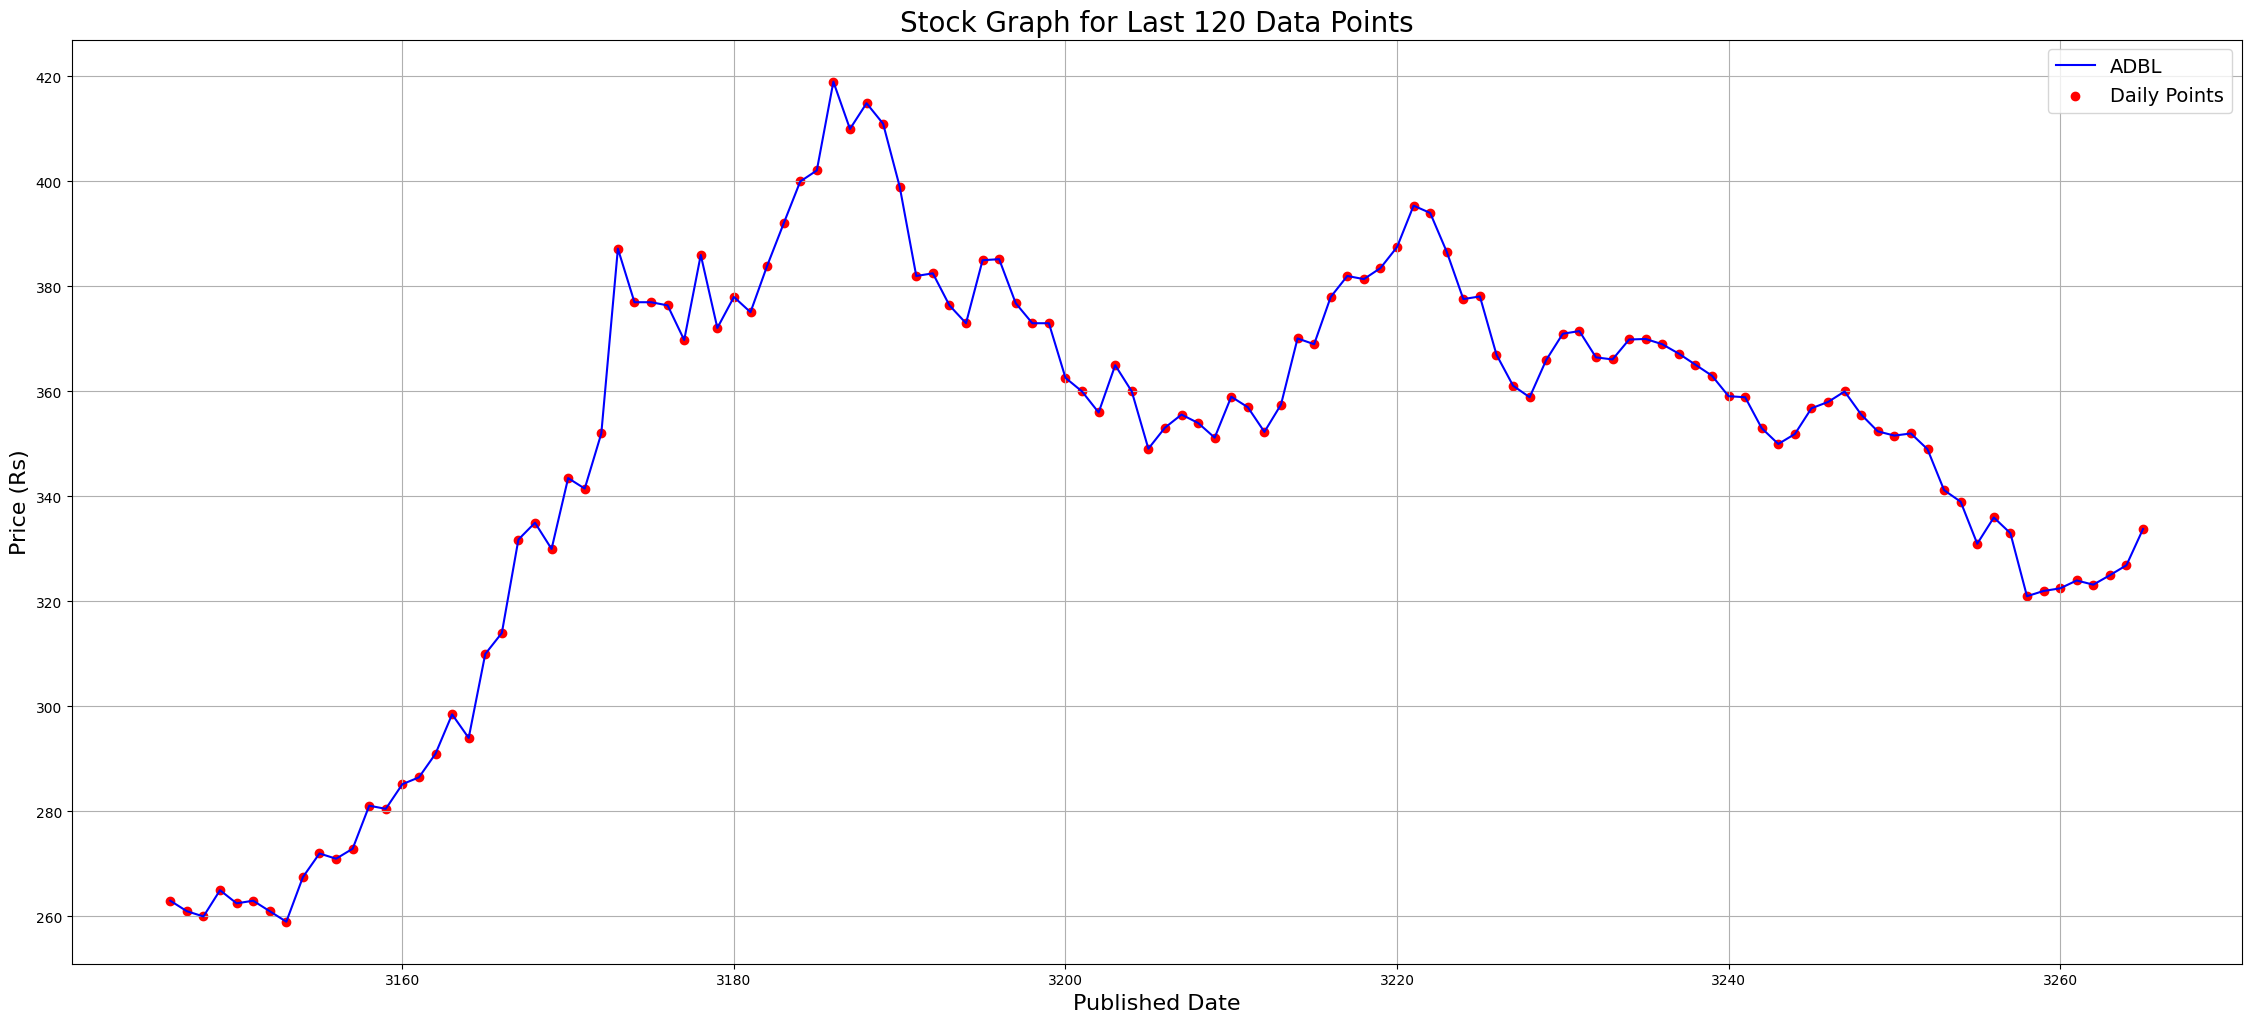

In [7]:
# Assuming `data` is your DataFrame and 'close' is the column with stock prices
# Slicing the last 120 rows
last_120_data = data.iloc[-120:]

plt.figure(figsize=(28, 12))  # Set the figure size

# Line plot for the stock prices
plt.plot(last_120_data.index, last_120_data['close'], label='ADBL', color='blue')

# Scatter plot to mark points for each day
plt.scatter(last_120_data.index, last_120_data['close'], color='red', label='Daily Points')

# Adding labels, title, legend, and grid
plt.xlabel('Published Date', fontsize=16)
plt.ylabel('Price (Rs)', fontsize=16)
plt.title('Stock Graph for Last 120 Data Points', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)  # Add grid for better readability

plt.show()


# Logic For Technical  Analysis

Moving averages (7 and 21 dayss)
MACD
Bolinger Bands
EMA
Momentum

In [8]:


def technical_analysis(dataset):
    # Moving Average of 7 and 21 days
    dataset.loc[:, 'ma7'] = dataset['close'].rolling(window=7).mean()
    dataset.loc[:, 'ma21'] = dataset['close'].rolling(window=21).mean()

    # Create MACD
    dataset.loc[:, '26ema'] = dataset['close'].ewm(span=26).mean()
    dataset.loc[:, '12ema'] = dataset['close'].ewm(span=12).mean()
    dataset.loc[:, 'MACD'] = dataset['12ema'] - dataset['26ema']

    # Create Bollinger Bands
    dataset.loc[:, '20sd'] = dataset['close'].rolling(window=21).std()
    dataset.loc[:, 'upper_band'] = dataset['ma21'] + (dataset['20sd'] * 2)
    dataset.loc[:, 'lower_band'] = dataset['ma21'] - (dataset['20sd'] * 2)

    # Create Exponential moving average
    dataset.loc[:, 'ema'] = dataset['close'].ewm(com=0.5).mean()

    # Create Momentum
    dataset.loc[:, 'momentum'] = dataset['close'] - 1
    dataset.loc[:, 'log_momentum'] = np.log(dataset['momentum'])

    return dataset


# Relative Strength Index

In [14]:
def calculate_RSI(data, window=14):
    # Calculate price changes
    delta = data['close'].diff(1)
    
    # Calculate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate the rolling average of gains and losses
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calculate the RS (Relative Strength)
    RS = avg_gain / avg_loss

    # Calculate RSI
    RSI = 100 - (100 / (1 + RS))
    
    # Assign the RSI to a new column
    data['RSI'] = RSI
    
    return data

# Add RSI to your dataset
df = calculate_RSI(data)
df.head()


,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status,RSI
0,2010-09-16,117.0,122.0,116.0,120.0,NaN,5280.0,0.0,0,NaN
1,2010-09-19,120.0,120.0,116.0,118.0,-1.67,2648.0,0.0,0,0.0
2,2010-09-20,118.0,119.0,116.0,118.0,0.00,2346.0,0.0,0,0.0
3,2010-09-21,118.0,118.0,115.0,116.0,-1.69,7160.0,0.0,0,0.0
4,2010-09-23,116.0,120.0,117.0,120.0,3.45,8417.0,0.0,0,50.0


In [15]:
df=technical_analysis(data)

In [16]:
df

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status,RSI,...,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,2010-09-16,117.0,122.0,116.0,120.0,NaN,5280.0,0.0,0,NaN,...,NaN,120.000000,120.000000,0.000000,NaN,NaN,NaN,120.000000,119.0,4.779123
1,2010-09-19,120.0,120.0,116.0,118.0,-1.67,2648.0,0.0,0,0.000000,...,NaN,118.961538,118.916667,-0.044872,NaN,NaN,NaN,118.500000,117.0,4.762174
2,2010-09-20,118.0,119.0,116.0,118.0,0.00,2346.0,0.0,0,0.000000,...,NaN,118.616067,118.558891,-0.057176,NaN,NaN,NaN,118.153846,117.0,4.762174
3,2010-09-21,118.0,118.0,115.0,116.0,-1.69,7160.0,0.0,0,0.000000,...,NaN,117.884729,117.751149,-0.133580,NaN,NaN,NaN,116.700000,115.0,4.744932
4,2010-09-23,116.0,120.0,117.0,120.0,3.45,8417.0,0.0,0,50.000000,...,NaN,118.375269,118.362154,-0.013115,NaN,NaN,NaN,118.909091,119.0,4.779123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,2024-12-19,328.9,328.9,323.8,324.0,0.47,99471.0,32378691.1,-1,15.909091,...,343.757143,344.193927,333.516648,-10.677279,13.472178,370.701498,316.812787,323.565485,323.0,5.777652
3262,2024-12-22,317.6,326.4,317.6,323.2,-0.25,30552.0,9872536.0,1,17.073171,...,342.057143,342.638821,331.929471,-10.709350,13.716033,369.489210,314.625076,323.321828,322.2,5.775172
3263,2024-12-23,321.0,326.0,318.0,325.0,0.56,34848.0,11232673.4,1,21.338912,...,340.723810,341.332242,330.863399,-10.468843,13.957898,368.639605,312.808014,324.440609,324.0,5.780744
3264,2024-12-24,327.4,329.0,322.1,326.9,0.58,24396.0,7956093.7,-1,24.744376,...,339.623810,340.263187,330.253645,-10.009542,14.099819,367.823448,311.424171,326.080203,325.9,5.786591


In [ ]:
%pip install nbformat

In [17]:
# Plotly Candlestick Chart with Indicators
fig = go.Figure()

# Candlestick
fig.add_trace(go.Candlestick(
    x=data.index,
    open=data['open'],
    high=data['high'],
    low=data['low'],
    close=data['close'],
    name='Candlestick'
))


In [18]:
df

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status,RSI,...,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,2010-09-16,117.0,122.0,116.0,120.0,NaN,5280.0,0.0,0,NaN,...,NaN,120.000000,120.000000,0.000000,NaN,NaN,NaN,120.000000,119.0,4.779123
1,2010-09-19,120.0,120.0,116.0,118.0,-1.67,2648.0,0.0,0,0.000000,...,NaN,118.961538,118.916667,-0.044872,NaN,NaN,NaN,118.500000,117.0,4.762174
2,2010-09-20,118.0,119.0,116.0,118.0,0.00,2346.0,0.0,0,0.000000,...,NaN,118.616067,118.558891,-0.057176,NaN,NaN,NaN,118.153846,117.0,4.762174
3,2010-09-21,118.0,118.0,115.0,116.0,-1.69,7160.0,0.0,0,0.000000,...,NaN,117.884729,117.751149,-0.133580,NaN,NaN,NaN,116.700000,115.0,4.744932
4,2010-09-23,116.0,120.0,117.0,120.0,3.45,8417.0,0.0,0,50.000000,...,NaN,118.375269,118.362154,-0.013115,NaN,NaN,NaN,118.909091,119.0,4.779123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,2024-12-19,328.9,328.9,323.8,324.0,0.47,99471.0,32378691.1,-1,15.909091,...,343.757143,344.193927,333.516648,-10.677279,13.472178,370.701498,316.812787,323.565485,323.0,5.777652
3262,2024-12-22,317.6,326.4,317.6,323.2,-0.25,30552.0,9872536.0,1,17.073171,...,342.057143,342.638821,331.929471,-10.709350,13.716033,369.489210,314.625076,323.321828,322.2,5.775172
3263,2024-12-23,321.0,326.0,318.0,325.0,0.56,34848.0,11232673.4,1,21.338912,...,340.723810,341.332242,330.863399,-10.468843,13.957898,368.639605,312.808014,324.440609,324.0,5.780744
3264,2024-12-24,327.4,329.0,322.1,326.9,0.58,24396.0,7956093.7,-1,24.744376,...,339.623810,340.263187,330.253645,-10.009542,14.099819,367.823448,311.424171,326.080203,325.9,5.786591


In [19]:
df = df.dropna()
df.rows = df.iloc[0]
df

# Drop the first row after setting it as the header
df = df.set_index('published_date')

print(df)
df.head()

                 open   high    low  close  per_change  traded_quantity  \
published_date                                                            
2010-10-24      134.0  135.0  130.0  134.0        0.00           2628.0   
2010-10-25      134.0  137.0  132.0  136.0        1.49           3285.0   
2010-10-26      136.0  138.0  134.0  135.0       -0.74           3381.0   
2010-10-27      135.0  135.0  132.0  135.0        0.00           9094.0   
2010-10-28      135.0  148.0  135.0  145.0        7.41          21662.0   
...               ...    ...    ...    ...         ...              ...   
2024-12-19      328.9  328.9  323.8  324.0        0.47          99471.0   
2024-12-22      317.6  326.4  317.6  323.2       -0.25          30552.0   
2024-12-23      321.0  326.0  318.0  325.0        0.56          34848.0   
2024-12-24      327.4  329.0  322.1  326.9        0.58          24396.0   
2024-12-26      323.4  335.0  322.0  333.8        2.11          53904.0   

                traded_a

C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_21996\610484397.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,open,high,low,close,per_change,traded_quantity,traded_amount,status,RSI,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,,,,,,,,,
2010-10-24,134.0,135.0,130.0,134.0,0.00,2628.0,0.0,0,72.727273,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,134.0,137.0,132.0,136.0,1.49,3285.0,0.0,0,74.285714,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,136.0,138.0,134.0,135.0,-0.74,3381.0,0.0,0,72.222222,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,135.0,132.0,135.0,0.00,9094.0,0.0,0,72.222222,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,135.0,148.0,135.0,145.0,7.41,21662.0,0.0,0,78.260870,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813


# Plotting these analysis

#  ALL 3 TECHNICAL INDICATOR PLOTTING


<Figure size 1600x1000 with 0 Axes>

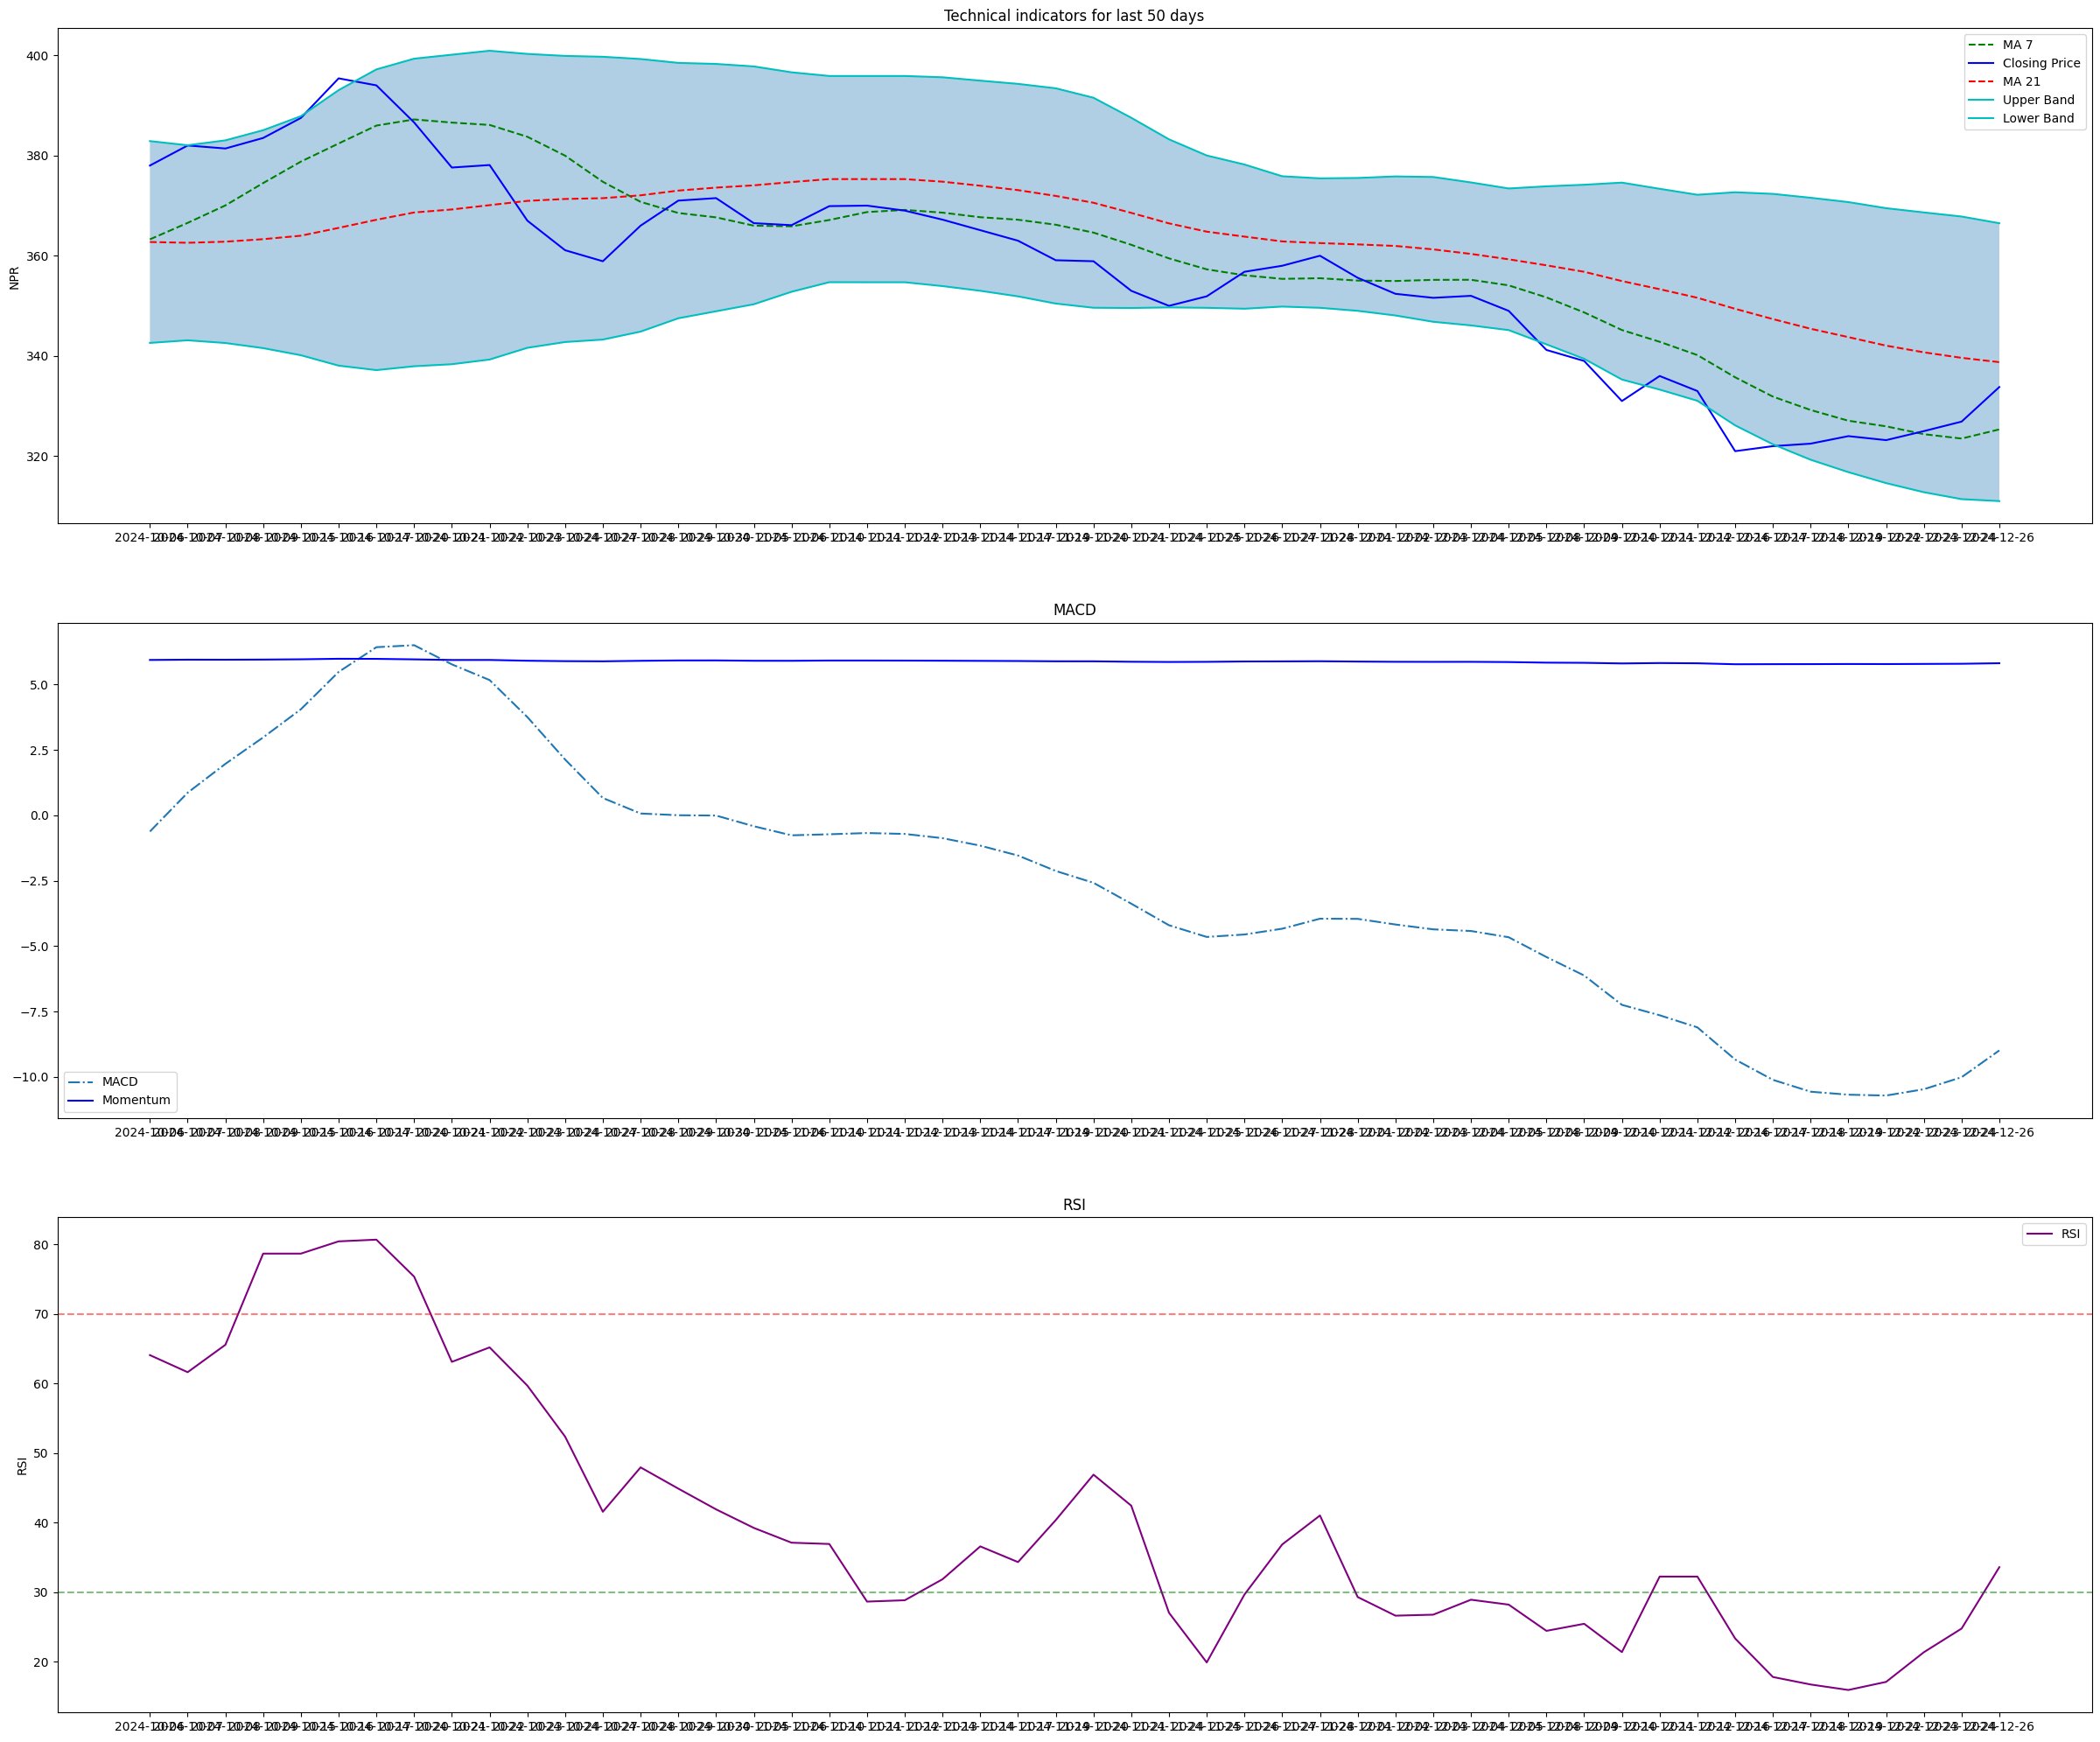

In [25]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0 - last_days

    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    plt.figure(figsize=(30, 25))
    
    # Plot first subplot: Moving Averages and Bollinger Bands
    plt.subplot(3, 1, 1)
    plt.plot(dataset['ma7'], label='MA 7', color='g', linestyle='--')
    plt.plot(dataset['close'], label='Closing Price', color='b')
    plt.plot(dataset['ma21'], label='MA 21', color='r', linestyle='--')
    plt.plot(dataset['upper_band'], label='Upper Band', color='c')
    plt.plot(dataset['lower_band'], label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title(f'Technical indicators for last {last_days} days')
    plt.ylabel('NPR')
    plt.legend()

    # Plot second subplot: MACD
    plt.subplot(3, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'], label='MACD', linestyle='-.')
    plt.plot(dataset['log_momentum'], label='Momentum', color='b', linestyle='-')
    plt.legend()

    # Plot third subplot: RSI
    plt.subplot(3, 1, 3)
    plt.title('RSI')
    plt.plot(dataset['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red')  # Overbought
    plt.axhline(30, linestyle='--', alpha=0.5, color='green')  # Oversold
    plt.ylabel('RSI')
    plt.legend()

    plt.show()

plot_technical_indicators(df, 50)


In [26]:
df

,open,high,low,close,per_change,traded_quantity,traded_amount,status,RSI,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,,,,,,,,,
2010-10-24,134.0,135.0,130.0,134.0,0.00,2628.0,0.0,0,72.727273,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,134.0,137.0,132.0,136.0,1.49,3285.0,0.0,0,74.285714,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,136.0,138.0,134.0,135.0,-0.74,3381.0,0.0,0,72.222222,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,135.0,132.0,135.0,0.00,9094.0,0.0,0,72.222222,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,135.0,148.0,135.0,145.0,7.41,21662.0,0.0,0,78.260870,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,328.9,328.9,323.8,324.0,0.47,99471.0,32378691.1,-1,15.909091,327.071429,343.757143,344.193927,333.516648,-10.677279,13.472178,370.701498,316.812787,323.565485,323.0,5.777652
2024-12-22,317.6,326.4,317.6,323.2,-0.25,30552.0,9872536.0,1,17.073171,325.957143,342.057143,342.638821,331.929471,-10.709350,13.716033,369.489210,314.625076,323.321828,322.2,5.775172
2024-12-23,321.0,326.0,318.0,325.0,0.56,34848.0,11232673.4,1,21.338912,324.385714,340.723810,341.332242,330.863399,-10.468843,13.957898,368.639605,312.808014,324.440609,324.0,5.780744


In [27]:
print(df.dtypes)


open               float64
high               float64
low                float64
close              float64
per_change         float64
traded_quantity    float64
traded_amount      float64
status               int64
RSI                float64
ma7                float64
ma21               float64
26ema              float64
12ema              float64
MACD               float64
20sd               float64
upper_band         float64
lower_band         float64
ema                float64
momentum           float64
log_momentum       float64
dtype: object


Text(0.5, 1.0, 'Params')

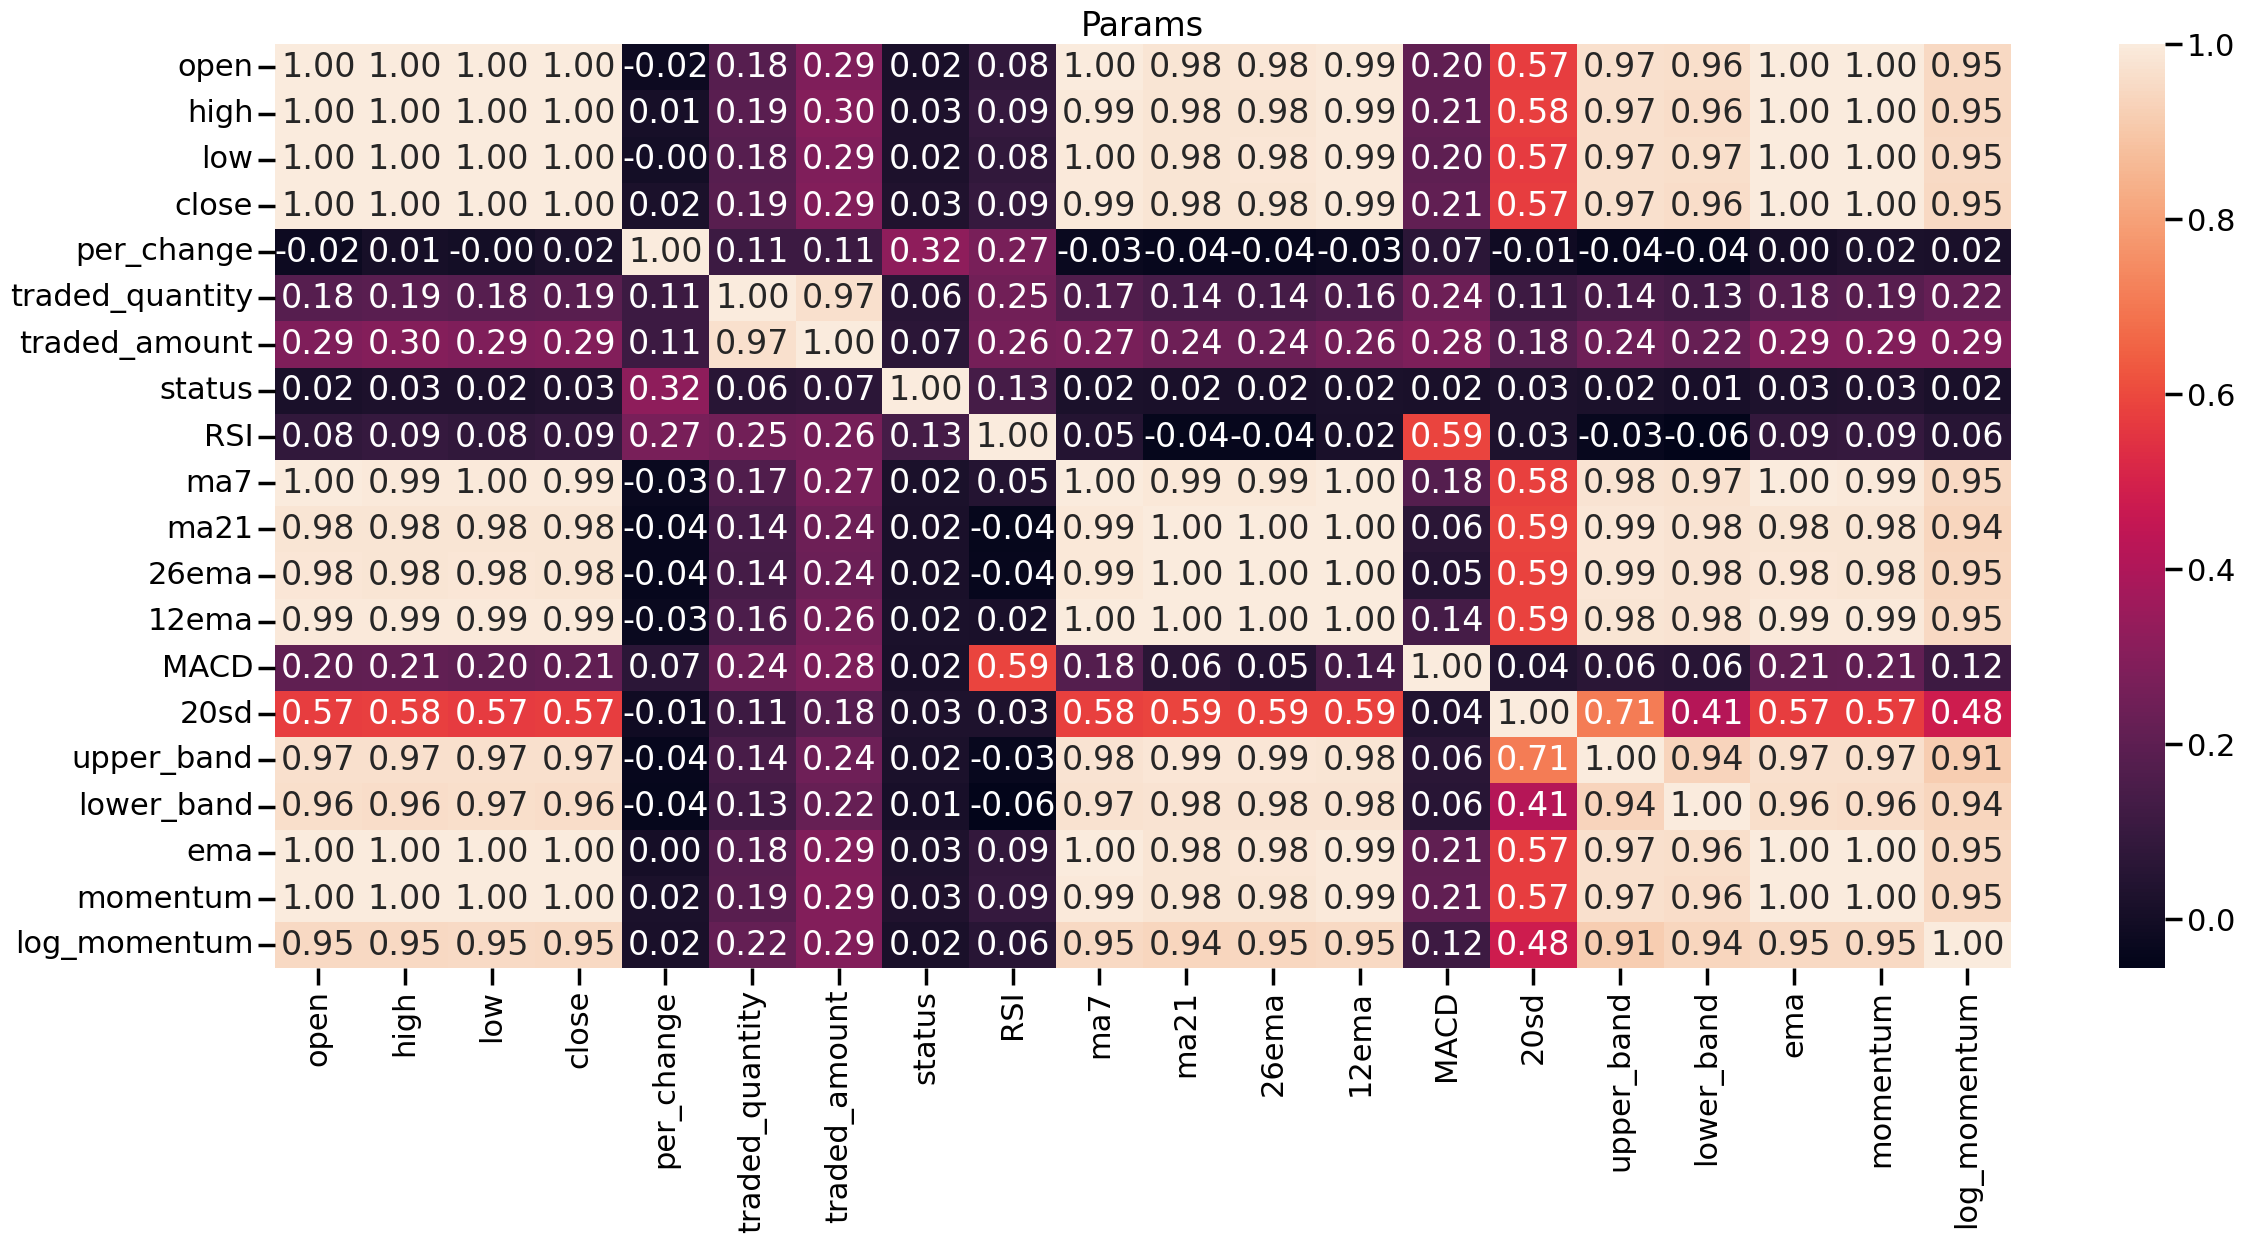

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(28, 12))
sns.set_context('poster', font_scale=1)
sns.heatmap(df.corr(), annot=True, fmt=".2f").set_title('Params')


In [31]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 3246 samples, and 20 features.


In [32]:
df.columns

Index(['open', 'high', 'low', 'close', 'per_change', 'traded_quantity',
       'traded_amount', 'status', 'RSI', 'ma7', 'ma21', '26ema', '12ema',
       'MACD', '20sd', 'upper_band', 'lower_band', 'ema', 'momentum',
       'log_momentum'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3246 entries, 2010-10-24 to 2024-12-26
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open             3246 non-null   float64
 1   high             3246 non-null   float64
 2   low              3246 non-null   float64
 3   close            3246 non-null   float64
 4   per_change       3246 non-null   float64
 5   traded_quantity  3246 non-null   float64
 6   traded_amount    3246 non-null   float64
 7   status           3246 non-null   int64  
 8   RSI              3246 non-null   float64
 9   ma7              3246 non-null   float64
 10  ma21             3246 non-null   float64
 11  26ema            3246 non-null   float64
 12  12ema            3246 non-null   float64
 13  MACD             3246 non-null   float64
 14  20sd             3246 non-null   float64
 15  upper_band       3246 non-null   float64
 16  lower_band       3246 non-null   float64
 17  ema 

In [74]:


data_training = df[df.index < '2022-01-31'].copy()

data_training

,open,high,low,close,per_change,traded_quantity,traded_amount,status,RSI,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,,,,,,,,,
2010-10-24,134.0,135.0,130.0,134.0,0.00,2628.0,0.0,0,72.727273,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,134.0,137.0,132.0,136.0,1.49,3285.0,0.0,0,74.285714,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,136.0,138.0,134.0,135.0,-0.74,3381.0,0.0,0,72.222222,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,135.0,132.0,135.0,0.00,9094.0,0.0,0,72.222222,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,135.0,148.0,135.0,145.0,7.41,21662.0,0.0,0,78.260870,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,434.0,434.0,418.0,422.0,-1.91,67946.0,28660971.0,-1,50.000000,433.457143,440.047619,441.624454,432.701533,-8.922921,28.211533,496.470686,383.624552,425.122846,421.0,6.042633
2022-01-25,420.0,425.0,415.0,419.9,-0.50,51430.0,21650239.0,-1,50.788091,431.300000,436.233333,440.015235,430.732066,-9.283169,24.923811,486.080954,386.385712,421.640949,418.9,6.037632
2022-01-26,420.0,420.0,415.0,416.4,-0.83,27790.0,11568945.6,-1,46.075085,427.785714,432.585714,438.265958,428.527133,-9.738825,21.581735,475.749184,389.422244,418.146983,415.4,6.029242


In [75]:
data_testing = df[df.index >= '2022-01-31'].copy()
data_testing

,open,high,low,close,per_change,traded_quantity,traded_amount,status,RSI,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,,,,,,,,,
2022-01-31,426.0,426.0,421.2,422.0,-0.64,20348.0,8603029.5,-1,44.000000,421.742857,426.238095,434.780094,425.755036,-9.025058,7.479069,441.196234,411.279957,422.086925,421.0,6.042633
2022-02-01,420.0,424.0,418.0,423.0,0.24,33761.0,14242566.1,1,49.067164,420.714286,426.619048,433.907495,425.331184,-8.576311,7.070617,440.760281,412.477814,422.695642,422.0,6.045005
2022-02-03,425.0,425.0,420.0,420.6,-0.57,47402.0,20034413.9,-1,44.067797,420.514286,426.552381,432.921754,424.603310,-8.318445,7.122754,440.797888,412.306874,421.298547,419.6,6.039302
2022-02-06,418.0,422.0,417.0,418.0,-0.62,33404.0,13980967.8,-1,32.142857,420.242857,426.504762,431.816439,423.587416,-8.229023,7.178891,440.862544,412.146980,419.099516,417.0,6.033086
2022-02-07,416.5,423.0,416.1,417.0,-0.24,26388.0,11022862.6,-1,21.830986,420.328571,426.314286,430.718925,422.573967,-8.144958,7.382431,441.079147,411.549424,417.699839,416.0,6.030685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,328.9,328.9,323.8,324.0,0.47,99471.0,32378691.1,-1,15.909091,327.071429,343.757143,344.193927,333.516648,-10.677279,13.472178,370.701498,316.812787,323.565485,323.0,5.777652
2024-12-22,317.6,326.4,317.6,323.2,-0.25,30552.0,9872536.0,1,17.073171,325.957143,342.057143,342.638821,331.929471,-10.709350,13.716033,369.489210,314.625076,323.321828,322.2,5.775172
2024-12-23,321.0,326.0,318.0,325.0,0.56,34848.0,11232673.4,1,21.338912,324.385714,340.723810,341.332242,330.863399,-10.468843,13.957898,368.639605,312.808014,324.440609,324.0,5.780744


In [76]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(2566, 20)


array([[0.03363914, 0.03168317, 0.03062302, ..., 0.0333404 , 0.03363914,
        0.11979934],
       [0.03363914, 0.03366337, 0.03273495, ..., 0.03474986, 0.03567788,
        0.12606938],
       [0.03567788, 0.03465347, 0.03484688, ..., 0.03453553, 0.03465851,
        0.12294606],
       ...,
       [0.32517839, 0.31386139, 0.33157339, ..., 0.32499944, 0.32150866,
        0.59823092],
       [0.32008155, 0.31683168, 0.33157339, ..., 0.32421474, 0.32212029,
        0.59883725],
       [0.33027523, 0.32574257, 0.33695882, ..., 0.3292211 , 0.32996942,
        0.60654177]])

In [77]:
X_train = []
y_train = []

In [78]:

# Assuming data_training_scaled has the correct shape
for i in range(60, data_training_scaled.shape[0]):
    X_train.append(data_training_scaled[i-60:i, 1:])  # Select all columns except for the target
    y_train.append(data_training_scaled[i, 0])  # Assuming the target variable is in the first column

# Convert lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Check the shapes
print(X_train.shape, y_train.shape)


(2506, 60, 19) (2506,)


In [79]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((2506, 60, 19), (2506,))

In [80]:
regressor = Sequential()    #Sequential   because we are predicting the stock market price.....

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 20)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

C:\Users\L E G I O N\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [81]:
regressor.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 60, 50)         │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 60, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 60, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,561 (713.13 KB)

 Trainable params: 182,561 (713.13 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [83]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 19 and 20 for '{{node sequential_4_1/lstm_16_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_4_1/lstm_16_1/strided_slice_2, sequential_4_1/lstm_16_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [?,19], [20,200].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(None, 19), dtype=float32)
  • states=('tf.Tensor(shape=(None, 50), dtype=float32)', 'tf.Tensor(shape=(None, 50), dtype=float32)')
  • training=True

# Testing Started

In [69]:
past_60 = data_training.tail(60)

dt = pd.concat([past_60, data_testing], ignore_index=True)
dt

,open,high,low,close,per_change,traded_quantity,traded_amount,status,RSI,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,521.4,535.0,520.0,521.0,-2.07,66975.0,35085959.1,-1,56.510417,526.000000,511.209524,520.556934,520.896206,0.339272,14.690844,540.591212,481.827835,525.426823,520.0,6.253829
1,521.0,529.9,515.0,528.5,1.44,30675.0,15991201.5,1,57.969799,529.642857,512.138095,521.145309,522.066020,0.920711,15.153200,542.444496,481.831695,527.475608,527.5,6.268149
2,539.0,549.0,533.0,542.9,2.72,103451.0,56207790.5,1,62.734786,534.057143,513.609524,522.756767,525.271248,2.514480,16.572867,546.755257,480.463791,537.758536,541.9,6.295081
3,543.0,544.0,528.0,528.0,-2.74,27478.0,14646766.0,-1,56.841389,534.485714,514.561905,523.145155,525.691056,2.545901,16.807393,548.176692,480.947118,531.252845,527.0,6.267201
4,528.1,530.0,512.0,515.0,-2.46,53120.0,27522253.7,-1,56.418919,529.342857,515.371429,522.541810,524.046278,1.504468,16.373611,548.118651,482.624206,520.417615,514.0,6.242223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,328.9,328.9,323.8,324.0,0.47,99471.0,32378691.1,-1,15.909091,327.071429,343.757143,344.193927,333.516648,-10.677279,13.472178,370.701498,316.812787,323.565485,323.0,5.777652
736,317.6,326.4,317.6,323.2,-0.25,30552.0,9872536.0,1,17.073171,325.957143,342.057143,342.638821,331.929471,-10.709350,13.716033,369.489210,314.625076,323.321828,322.2,5.775172
737,321.0,326.0,318.0,325.0,0.56,34848.0,11232673.4,1,21.338912,324.385714,340.723810,341.332242,330.863399,-10.468843,13.957898,368.639605,312.808014,324.440609,324.0,5.780744
738,327.4,329.0,322.1,326.9,0.58,24396.0,7956093.7,-1,24.744376,323.514286,339.623810,340.263187,330.253645,-10.009542,14.099819,367.823448,311.424171,326.080203,325.9,5.786591


In [70]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(740, 20)


array([[0.9325    , 0.95679012, 0.95806452, ..., 0.96073729, 0.9314554 ,
        0.95368012],
       [0.93125   , 0.94104938, 0.94193548, ..., 0.96726038, 0.95492958,
        0.96975915],
       [0.9875    , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.30625   , 0.3117284 , 0.30645161, ..., 0.32082104, 0.31799687,
        0.42248405],
       [0.32625   , 0.32098765, 0.31967742, ..., 0.32604131, 0.32394366,
        0.42904934],
       [0.31375   , 0.33950617, 0.31935484, ..., 0.34242725, 0.34553991,
        0.45257396]])

In [71]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape


((680, 60, 20), (680,))

In [84]:
y_pred = regressor.predict(X_test)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [85]:
scale = 1/scalar.scale_[0]# Reshape y_pred and y_test to match the shape expected by inverse_transform
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Inverse transform to get the actual stock prices
y_pred_actual = scalar.inverse_transform(np.concatenate((y_pred, inputs[60:, 1:]), axis=1))[:, 0]
y_test_actual = scalar.inverse_transform(np.concatenate((y_test, inputs[60:, 1:]), axis=1))[:, 0]



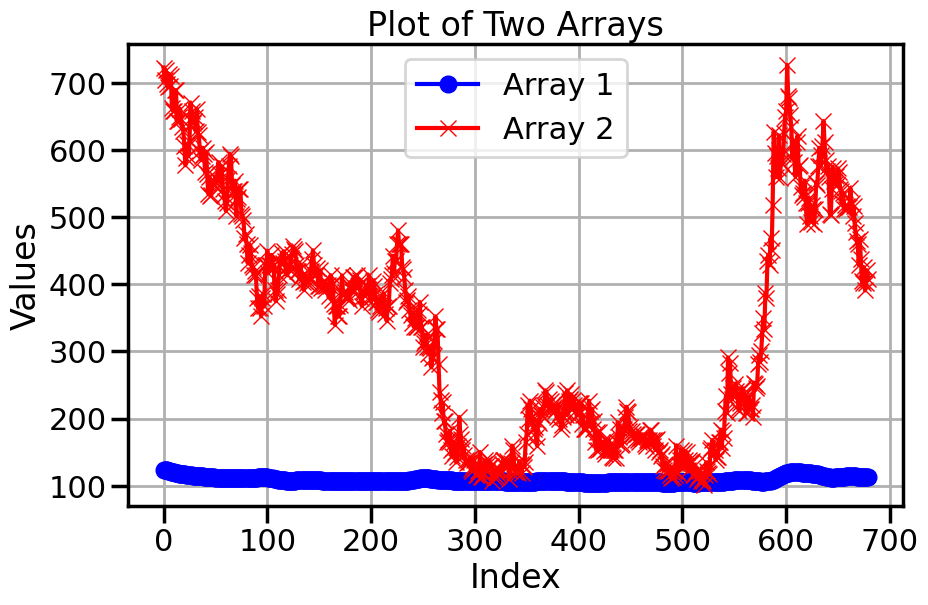

In [88]:
plt.figure(figsize=(10, 6))

# Assuming index as the x-axis
plt.plot(y_pred_actual, label='Array 1', color='b', marker='o')
plt.plot(y_test_actual, label='Array 2', color='r', marker='x')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot of Two Arrays')
plt.legend()
plt.grid(True)
plt.show()

# Visualization of All the Codes and Work Done Above

In [ ]:
# Visualising the results
plt.figure(figsize=(30,15))
plt.plot(y_test_actual, color = 'red', label = 'Real Price of the stock')
plt.plot(y_pred_actual, color = 'blue', label = 'Predicted Predicted Price of the Stock')
plt.title('Nepse Stock Perediction of given company')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Predicting for 6 months   

In [ ]:
# Number of days to predict into the future (6 months ≈ 180 days)
future_days = 180

# Create a copy of the last 60 days of training data to start the prediction
future_input = inputs[-60:].copy()

# Array to store predictions
future_predictions = []

for _ in range(future_days):
    # Reshape input to match LSTM input shape
    future_input_reshaped = future_input.reshape(1, future_input.shape[0], future_input.shape[1])
    
    # Predict the next value
    predicted_value = regressor.predict(future_input_reshaped)
    
    # Store the prediction
    future_predictions.append(predicted_value[0])
    
    # Update the input by removing the oldest value and appending the new prediction
    future_input = np.vstack((future_input, np.concatenate((predicted_value, np.zeros((1, future_input.shape[1] - 1))), axis=1)))
    future_input = future_input[1:]

# Convert predictions back to actual values
future_predictions_actual = scalar.inverse_transform(
    np.concatenate((future_predictions, np.zeros((len(future_predictions), inputs.shape[1] - 1))), axis=1)
)[:, 0]

# Generate future dates
last_date = pd.to_datetime(data_testing.index[-1])
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

# Visualise results
plt.figure(figsize=(30, 15))
plt.plot(y_test_actual, color='red', label='Real Price of the Stock')
plt.plot(y_pred_actual, color='blue', label='Predicted Price of the Stock (up to current date)')
plt.plot(range(len(y_test_actual), len(y_test_actual) + future_days), future_predictions_actual, color='green', label='Predicted Future Price (6 months)')
plt.title('Nepse Stock Prediction of Given Company')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
